# Introduction:


John Doe is a rich billionaire invester who enjoys investing his money into different businesses and fields. Recently he has taken an interest in baseball and is looking to buy a team. John is also very competetive and enjoys winning. He was able to snatch some pitching statistics from the last 40 years in the Korean league. Knowing that a good pitching staff leads to a good winning team, he has asked us to predict the top 5 teams with the highest win percentage based on their pitching statistics. 


# Data Wrangling

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
import datetime

import os


#importing csv and doing a routine check on the info of the dataset

hey_batter = pd.read_csv('C:\\Users\\ebent\\OneDrive\\Documents\\GitHub\\Hey Batter Batter!\\Hey-Batter-Batter-\\csv\\kbopitchingdata.csv')
hey_batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   323 non-null    int64  
 1   year                 323 non-null    int64  
 2   team                 323 non-null    object 
 3   average_age          323 non-null    float64
 4   runs_per_game        323 non-null    float64
 5   wins                 323 non-null    int64  
 6   losses               323 non-null    int64  
 7   win_loss_percentage  323 non-null    float64
 8   ERA                  323 non-null    float64
 9   run_average_9        323 non-null    float64
 10  games                323 non-null    int64  
 11  games_started        184 non-null    float64
 12  games_finished       184 non-null    float64
 13  complete_game        323 non-null    int64  
 14  shutouts             323 non-null    int64  
 15  saves                323 non-null    int

We can see we have a lot of different stats here. We most likely are not going to use all of them but we should know what each one does. Here is some identifying information so we know what we are working with: 

- year
- teams
- average_age: Average pitcher age
- runs_per_game: Runs scored per game
- wins: Total wins per season
- losses: Total losses per season
- win_loss_percentage
- ERA: Pitching ERA: number of earned runs a pitcher allows per 9 innings
- run_average_9: run average per 9 innings
- games: Games played
- games_started: Games started
- games_finished: Games finished
- complete_game: Complete games
- shutouts: No runs allowed and complete games
- saves: pitcher who finishes a game for the winning team (certain prerequisites required)
- innings_pitched
- hits: Hits allowed
- runs: Runs allowed
- earned_runs: Earned runs allowed
- home_runs: Home runs allowed
- walks: Walks allowed
- intentional_walks: Intentional walks allowed
- strikeouts
- hit_batter: Hit batter with pitch
- balks: An illegal act by a pitcher with a runner or runners on base entitling all batters to advance one base
- wild_pitches: potential bases being awarded
- batters_faced
- WHIP: (Walks + Hits) / Total Innings Pitched
- hits_9: Hits per 9 innings
- homeruns_9: Homeruns per 9 innings
- walks_9: Walks per 9 innings
- strikeouts_9: Strikeouts per 9 innings
- strikeout_walk: strikeouts / walks

So far it's a lot of information but we can already identify that some of these might be more important stats than others. For example ERA which is the number of earned runs a pitcher allows per 9 innings is probably a more important statistic than shutouts. In baseball the more runs you let the other team score the more likely it is your team loses. So having a low average ERA for your pitching staff is going to be a big part of a team's winning percentage. Shutouts on the other hand are pretty rare and is often a pretty low stat. Having a higher number than average is a good thing, but it probably won't be the main determining factor for deciding a team's win percentage. 

In [2]:
#taking head(-5) just for a better look at the data both at the top and bottom since the data spans over long years

hey_batter.head(-5)

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,314,1983,Haitai Tigers,25.3,3.90,55,44,0.556,3.16,3.97,...,45,NaN,NaN,3707,1.232,8.2,0.6,2.9,4.6,1.59
314,315,1983,Samsung Lions,26.1,4.18,46,50,0.479,3.42,4.18,...,58,NaN,NaN,3785,1.299,8.3,0.7,3.4,4.0,1.19
315,316,1983,OB Bears,26.9,4.32,44,55,0.444,3.54,4.36,...,62,NaN,NaN,3789,1.358,9.0,0.8,3.2,3.3,1.04
316,317,1983,Lotte Giants,26.4,4.64,43,56,0.434,3.79,4.65,...,47,NaN,NaN,3827,1.331,9.4,0.9,2.6,4.2,1.60


Initially we see we have some missing values that looks like they correspond to the earlier years of the data (1980s vs 2020s). I also noticed that the spread of the data takes place over 40 years time. Since we are predicting data for 2022, we should know that most professional athletes don't play for 40 years at a time but usually on an average from 5-15 years. We don't have to do anything for now but we most likely will split the data for training/testing based on this knowledge. 

Lets investigate a little more into our missing data values. 

In [3]:
#checking for null count values

hey_batter_missing = pd.concat([hey_batter.isnull().sum()], axis=1)
hey_batter_missing.columns=['missing']
hey_batter_missing.sort_values(by='missing', ascending=False)

,missing
balks,139
intentional_walks,139
games_finished,139
games_started,139
wild_pitches,139
hit_batter,0
home_runs,0
walks,0
strikeouts,0
id,0


All of the missing data have the same number of values in the same 5 categories which leads me to believe, based on our previous head(-5) that maybe these 5 categories were not stats that were recorded pre-a certain year in the Korean league.  

In [4]:
#subset a dataframe and checking for which year this information began recording

missing_df = hey_batter[['year', 'balks', 'intentional_walks', 'games_finished', 'games_started', 'wild_pitches']]
print(missing_df.to_string())

     year  balks  intentional_walks  games_finished  games_started  wild_pitches
0    2021    5.0               17.0           143.0          143.0          43.0
1    2021    1.0               18.0           141.0          143.0          56.0
2    2021    7.0               16.0           141.0          143.0          51.0
3    2021    3.0               13.0           141.0          143.0          56.0
4    2021    8.0               14.0           140.0          143.0          74.0
5    2021    4.0               27.0           142.0          143.0          58.0
6    2021    9.0               27.0           143.0          143.0          40.0
7    2021   11.0               22.0           142.0          143.0          56.0
8    2021    9.0                5.0           142.0          143.0          58.0
9    2021    5.0               19.0           142.0          143.0         102.0
10   2020    7.0               16.0           144.0          144.0          51.0
11   2020    4.0            

Looks like all the data pre-2001 was not inputted or at the very least not recorded during those time periods. We'll most likely have to do some more digging but it could be these stats are maybe not as important or were recently added due to some new information based on baseball knowledge. 

Next I'm going to take a look at the names of the teams which is our only object oriented data type. Since it spans over the range of 40 years, there is going to be duplicated name teams but I also know there have been additions and name changes over the years, for example: the SSG Landers recently changed their name but were known as the SK Wyverns originally. The team itself didn't change but only the name. So to make things easier, we should research and update all previous names to their current names of the teams. We will still be analyzing the same data of the team but lessen the clutterness. 

In [5]:
#check for which teams names are recorded

hey_batter['team'].value_counts()

Samsung Lions            40
Lotte Giants             40
LG Twins                 32
Hanwha Eagles            28
Doosan Bears             23
Kia Tigers               21
SK Wyverns               21
Haitai Tigers            19
OB Bears                 17
Hyundai Unicorns         12
Ssangbangwool Raiders     9
Nexen Heroes              9
NC Dinos                  9
Pacific Dolphins          8
Binggre Eagles            8
MBC Blue Dragons          8
KT Wiz                    7
Kiwoom Heroes             3
Chungbo Pintos            3
Sammi Superstars          3
Woori Heroes              2
SSG Landers               1
Name: team, dtype: int64

In [6]:
#renaming the teams to their current team name

hey_batter['team'].replace({'SK Wyverns': 'SSG Landers', 'Sammi Superstars': 'Kiwoom Heroes', 'Chungbo Pintos': 'Kiwoom Heroes', 'Pacific Dolphins': 'Kiwoom Heroes','Hyundai Unicorns': 'Kiwoom Heroes', 'Woori Heroes': 'Kiwoom Heroes', 'Nexen Heroes': 'Kiwoom Heroes', 'MBC Blue Dragons': 'LG Twins', 'Binggre Eagles': 'Hanwha Eagles', 'OB Bears': 'Doosan Bears', 'Haitai Tigers': 'Kia Tigers'}, inplace=True)

In [7]:
#recheck team names to see if they are updated

hey_batter['team'].value_counts()

LG Twins                 40
Doosan Bears             40
Samsung Lions            40
Kiwoom Heroes            40
Kia Tigers               40
Lotte Giants             40
Hanwha Eagles            36
SSG Landers              22
NC Dinos                  9
Ssangbangwool Raiders     9
KT Wiz                    7
Name: team, dtype: int64

Now that we have all our teams properly renamed, we need to make sure the teams we are investigating are teams that participated in the 2021 season since we will be predicting the top teams for the 2022 season. 

In [8]:
#check first for teams that played in the 2021 season as our target teams of interest

teams_of_interest = hey_batter[hey_batter['year'] == 2021]
teams_of_interest

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,hit_batter,balks,wild_pitches,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk
0,1,2021,LG Twins,26.3,3.90,72,57,0.558,3.57,3.96,...,97,5.0,43.0,5416,1.312,8.0,0.6,3.9,7.6,1.96
1,2,2021,KT Wiz,28.4,4.06,75,59,0.560,3.67,4.17,...,42,1.0,56.0,5359,1.316,8.4,0.6,3.5,7.5,2.16
2,3,2021,Doosan Bears,27.5,4.57,70,65,0.519,4.28,4.66,...,73,7.0,51.0,5596,1.487,9.2,0.7,4.2,7.4,1.77
3,4,2021,Samsung Lions,28.8,4.57,75,59,0.560,4.29,4.70,...,51,3.0,56.0,5496,1.450,9.3,0.9,3.8,7.4,1.96
4,5,2021,NC Dinos,27.7,4.80,67,67,0.500,4.50,4.95,...,77,8.0,74.0,5575,1.476,9.1,0.9,4.2,7.5,1.79
5,6,2021,Kiwoom Heroes,25.8,4.89,69,67,0.507,4.33,5.02,...,80,4.0,58.0,5568,1.469,9.2,0.7,4.1,6.4,1.58
6,7,2021,SSG Landers,27.3,5.13,66,63,0.512,4.80,5.20,...,78,9.0,40.0,5661,1.504,9.1,1.0,4.4,7.1,1.61
7,8,2021,Hanwha Eagles,27.0,5.13,49,82,0.374,4.67,5.29,...,101,11.0,56.0,5633,1.496,8.6,0.8,4.8,7.2,1.50
8,9,2021,Kia Tigers,25.3,5.22,58,75,0.436,4.89,5.33,...,104,9.0,58.0,5658,1.500,9.1,1.0,4.4,6.8,1.54
9,10,2021,Lotte Giants,27.1,5.64,64,71,0.474,5.39,5.75,...,86,5.0,102.0,5722,1.571,9.5,0.9,4.7,7.5,1.60


We have 10 teams in total that participated in the 2021 season that we will be analyzing. The only team not apart of the 2022 season is the Ssangbangwool Raiders who had unfortunately sold their franchise spot to the SSG Landers due to bankruptcy. We should drop them since they will not be participating  

In [9]:
hey_batter = hey_batter[hey_batter['team'] != 'Ssangbangwool Raiders']
hey_batter['team'].value_counts()

LG Twins         40
Doosan Bears     40
Samsung Lions    40
Kiwoom Heroes    40
Kia Tigers       40
Lotte Giants     40
Hanwha Eagles    36
SSG Landers      22
NC Dinos          9
KT Wiz            7
Name: team, dtype: int64

Next lets look at our win percentage for each team. Our goal is to predict each teams win percentage and find the highest win percentages of those teams so we should check out our ovservation of choice are for each team. 

In [10]:
#calculating the average win percentage of each team and sort by highest

avg_team_win_perc = hey_batter.groupby('team')[['win_loss_percentage']].mean()
avg_team_win_perc.rename(columns={'win_loss_percentage': 'avg_win_loss_percentage'}, inplace=True)
avg_team_win_perc = avg_team_win_perc.sort_values(by = 'avg_win_loss_percentage', ascending=False)
avg_team_win_perc.head(11)

,avg_win_loss_percentage
team,
Samsung Lions,0.553425
NC Dinos,0.526222
Doosan Bears,0.524775
SSG Landers,0.520682
Kia Tigers,0.519525
LG Twins,0.491175
Kiwoom Heroes,0.481725
Lotte Giants,0.470825
Hanwha Eagles,0.467750


In [11]:
#checking for the best win percentage each team has gotten to see if there is any similarities in the top 5 for averages and max

max_team_win_perc = hey_batter.groupby('team')[['win_loss_percentage']].max()
max_team_win_perc.rename(columns={'win_loss_percentage': 'max_win_loss_percentage'}, inplace=True)
max_team_win_perc = max_team_win_perc.sort_values(by = 'max_win_loss_percentage', ascending=False)
max_team_win_perc.head(11)

,max_win_loss_percentage
team,
Samsung Lions,0.706
Doosan Bears,0.700
Kiwoom Heroes,0.695
Kia Tigers,0.659
SSG Landers,0.659
Hanwha Eagles,0.653
LG Twins,0.643
NC Dinos,0.601
Lotte Giants,0.591


In [12]:
#concat dataframes side by side

team_win_perc = pd.concat([avg_team_win_perc, max_team_win_perc], axis=1)
team_win_perc

,avg_win_loss_percentage,max_win_loss_percentage
team,,
Samsung Lions,0.553425,0.706
NC Dinos,0.526222,0.601
Doosan Bears,0.524775,0.700
SSG Landers,0.520682,0.659
Kia Tigers,0.519525,0.659
LG Twins,0.491175,0.643
Kiwoom Heroes,0.481725,0.695
Lotte Giants,0.470825,0.591
Hanwha Eagles,0.467750,0.653


The top 5 teams have been able to retain an average win percentage of 0.51 or higher. Looking at the max win percentage each team has reached, Samsung Lions, Doosan Bears, SSG Landers, Kia Tigers are all within the top 5 of both max and average win percentage. Max win percentage isn't really important but this can be a slightly good indicator of which teams have a good structured organization and are able to maintain top standing positions within the league. 

# Exploratory Data Analysis

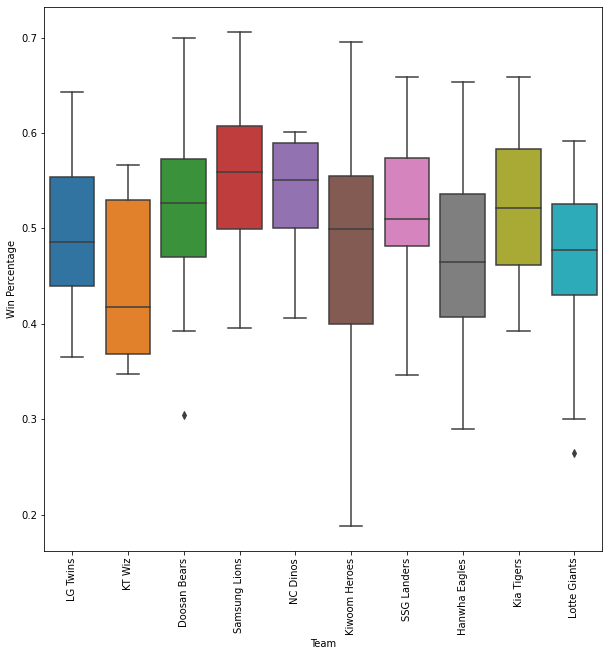

In [13]:
#create a boxplot to get a graphical view of win percentages and where each teams quartiles stand

plt.subplots(figsize=(10, 10))
sns.boxplot(x='team', y='win_loss_percentage', data=hey_batter)
plt.xticks(rotation='vertical')
plt.ylabel('Win Percentage')
plt.xlabel('Team');

Our boxplot displays the ranges of win percentage our teams have had over the years. Most of the ranges stay within 0.4 to 0.58 percent. However some teams show smaller boxes such as NC Dinos or SSG Landers that display more consistency compared to a team such as Kiwoom Heroes which have larger boxes and ranges displaying less consistent winning seasons. Teams like the NC Dinos and Samsung Lions also have a higher 25% quartile compared to other teams showing that on average they will have higher winning season percentages compared to other teams. 

As for any outliers, we can ignore. There isn't any reasonable way to deal with outliers within our dataset since this is actual confirmed recorded data. Baseball is a sport with a pretty good stat recording system, so any of our datapoints can be assumed to be true. Outliers can also be good data for us to take into account. If a team had a particularly bad season, it can mean a multitude of things such as bad infrastructure or the team is in the process of rebuilding a good team which takes time and money. This would mean bad business for our John Doe who is looking to buy a winning team. 

Next we will look at our numeric data. So far we know that we are missing some data from the earlier years of the KBO for a few of our stats, but for the most part we have a pretty filled in dataset. 

In [14]:
#using .describe() to get a numerical analysis of our feature values

hey_batter.describe().T

,count,mean,std,min,25%,50%,75%,max
id,314.0,160.044586,93.915117,1.000,79.2500,157.5000,241.75000,323.000
year,314.0,2003.171975,11.577591,1982.000,1993.0000,2004.0000,2013.75000,2021.000
average_age,314.0,26.932484,1.595650,23.400,25.8000,27.0000,28.10000,32.400
runs_per_game,314.0,4.617325,0.733150,2.980,4.0400,4.6200,5.05750,7.180
wins,314.0,62.869427,12.315818,15.000,55.0000,64.0000,71.00000,93.000
losses,314.0,62.216561,12.310321,24.000,53.0000,62.0000,71.00000,97.000
win_loss_percentage,314.0,0.502599,0.085134,0.188,0.4485,0.5075,0.56175,0.706
ERA,314.0,4.201051,0.750488,2.540,3.6200,4.2200,4.68750,6.350
run_average_9,314.0,4.682293,0.767404,3.030,4.0825,4.6650,5.18000,7.470
games,314.0,128.184713,13.175552,80.000,126.0000,128.0000,133.00000,144.000


The .describe.T is a good way to look at the entire KBO league stats to see some league averages. However we do know that we have quite some data missing from a few of our stats. It's important to note that since these teams are in the league together and facing against each other, our averages mean much more in terms of determining which teams will on average do better. Since they compete in a league against each other that means there is an order of their stats, such as when a team places last place then there is an equally opposite first place and so on so forth. So when team stats are above average that means they are doing better than most of the other league teams. Now this data encompasses all team data from 1980s and teams generally have changed a lot over the years but the league averages should still hold up about the same. Let's check. 

In [15]:
#doing the same as above but with more recent baseball years (2000's)

hey_batter_2000 = hey_batter[hey_batter['year'] > 2000]
hey_batter_2000.describe().T

,count,mean,std,min,25%,50%,75%,max
id,184.0,92.500000,53.260367,1.000,46.75000,92.5000,138.25000,184.000
year,184.0,2011.559783,6.121423,2001.000,2006.00000,2012.0000,2017.00000,2021.000
average_age,184.0,27.611957,1.399402,23.800,26.57500,27.6000,28.52500,32.400
runs_per_game,184.0,4.874891,0.670656,3.560,4.36750,4.8300,5.34000,6.950
wins,184.0,66.288043,11.052714,35.000,59.00000,66.5000,73.25000,93.000
losses,184.0,66.288043,11.146744,43.000,57.00000,66.5000,74.00000,97.000
win_loss_percentage,184.0,0.500049,0.078648,0.265,0.45075,0.5000,0.56000,0.659
ERA,184.0,4.494076,0.651622,3.220,3.98000,4.4600,4.96250,6.350
run_average_9,184.0,4.940163,0.698318,3.580,4.40750,4.8900,5.44750,7.090
games,184.0,135.423913,7.089180,126.000,128.00000,133.0000,144.00000,144.000


Even if we take the newer generation of teams based on year, the averages for stats are still generally the same with miniscule differences. Some stats do improve marginally better such as ERA and strikeouts_9 but that is to be expected and I'll explain why soon. For now lets check our data graphically using some histograms to see the distribution of our features. 

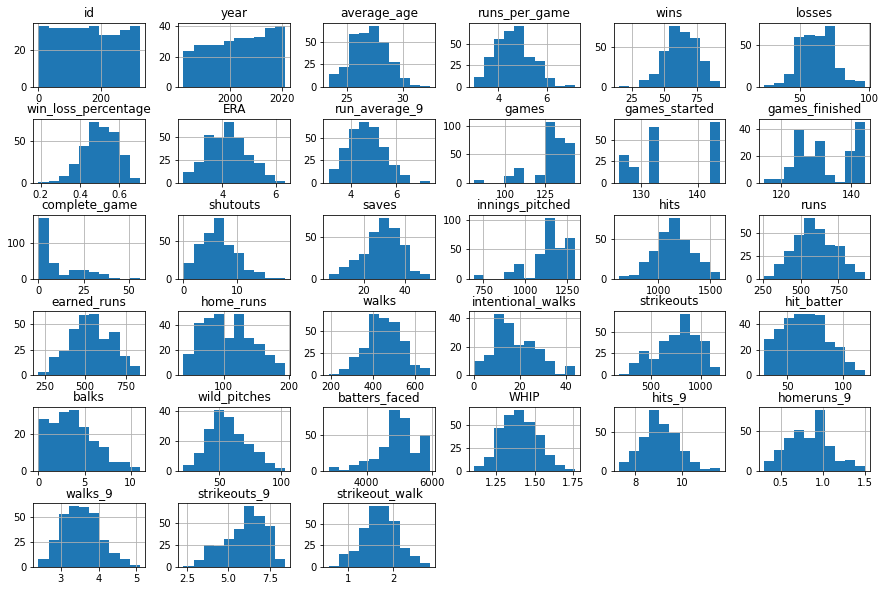

In [16]:
#plotting a histogram of our features to help with looking at our distribution of features

hey_batter.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

At a first glance it seems we have quite some skewed data or large amounts of gaps within the data with: 

1. games
2. games_started
3. games_finished
4. innings_pitched
5. batters_faced

However, we know should know that the KBO have made changes over the years to increase the amount of games that are in a season. With this increase in games it makes sense why there might be gaps in games or games_started or why there might be skews in the data. Since the amount of games have increased, the amount of games_finished, innings_pitched, and batters_faced would increase and begin to skew left or the amount of games they started (games_started) would increase explaining a gap between the number ranges. Both games_finished and games_started are also part of our missing data values as well. 

The complete_games stat also looks skewed right at first but it can be explained that back in the older days of baseball, pitchers used to actually pitch complete games regularly which explains why there is a quite a few numbers in the 15-60 range. However, as time went on this practice stopped due to the prevalence of injuries and trying to preserve player's prime(good) years explaining the massive increase in count for the 0-5 range. Nowadays pitchers don't regularly pitch complete games unless for no-hitters or perfect games which are pretty rare. This tactic has also led to an increase in pitching performance for the newer generation of baseball which is why we can expect newer players to have slightly better stats than older players as explained above.   

Everything else looks up to par with the histograms being mostly normal or very explainable as to why they are slightly skewed 

First lets handle our missing values. Half of the data for thats stats are missing so it wouldn't make sense to impute the data or take averages for half of the data, so we'll just drop them. 

In [17]:
#dropping our columns with missing values since there is way too many missing values

hey_batter.drop(columns=['balks', 'intentional_walks', 'games_finished', 'games_started', 'wild_pitches'], inplace=True)

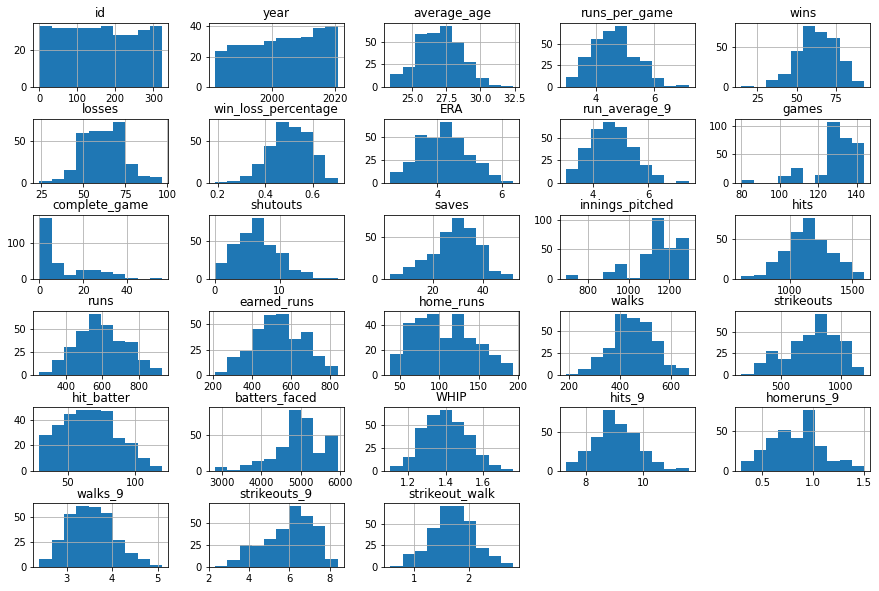

In [18]:
#rechecking distributions after dropped columns

hey_batter.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

This looks much better. There is still skews and not entirely normal distributions in some of our features, but that is to be expected with the changes in the amount of games played in the league and the way baseball is played in general. Teams have bad seasons, good seasons, average seasons all the time leading to a fluctuation on our distributions. 

Next lets look at some team summary statistics. Right now we see our distributions for our features but they don't distinguish between teams. We're only going to be looking at a few of these features based on our own baseball knowledge to understand which statistics would most likely be important in winning games. Whats important to note is baseball is a sport where you buy runs since runs are what win games. So when looking at pitchers, you want stats that prevent runs. Things such as: 

1.ERA - (earned run average per 9 innings) 

2.WHIP - (walks and hits per inning) 

3.strikeouts_9 - (strikeouts per 9 innings)

4.saves - (relief pitchers who end the game on a win)

5.innings_pitched - (the amount of innings a team has pitched)

The reasons for picking these stats are pretty simple to understand. When playing baseball the more amount of runs you score the higher your chances for winning. So a pitcher's job is to prevent runs and people getting on base (getting on base leads to scoring). A team with a low average ERA, low average WHIP, high average strikeouts_9, high average saves, and high average innings_pitched shows they can prevent runs, prevent people getting on base a lot, and have high durability for lots of games. As a note, these are just our opinionated picks for which stats are important. We'll perform some more in depth mathematical analysis to correlate stats later on. 


In [19]:
#creating a team summary with the average statistics of these stats between all of our teams over the course of how many years
#each team has been in the league

team_summary = hey_batter.groupby('team').agg(
    year = pd.NamedAgg(column='year', aggfunc='size'), 
    team_ERA = pd.NamedAgg(column='ERA', aggfunc='mean'),
    team_WHIP = pd.NamedAgg(column='WHIP', aggfunc='mean'),
    team_strikeouts_9 = pd.NamedAgg(column='strikeouts_9', aggfunc='mean'),
    team_saves = pd.NamedAgg(column='saves', aggfunc='mean'),
    team_innings_pitched = pd.NamedAgg(column='innings_pitched', aggfunc='mean')
    
).reset_index()
team_summary.head(10)

,team,year,team_ERA,team_WHIP,team_strikeouts_9,team_saves,team_innings_pitched
0,Doosan Bears,40,3.938250,1.375900,5.707500,28.500000,1123.535000
1,Hanwha Eagles,36,4.483056,1.422611,6.061111,28.527778,1149.297222
2,KT Wiz,7,5.010000,1.519143,6.771429,27.428571,1270.200000
3,Kia Tigers,40,4.069250,1.362825,6.130000,27.550000,1119.410000
4,Kiwoom Heroes,40,4.233000,1.414600,5.805000,29.200000,1124.942500
5,LG Twins,40,4.107750,1.396600,5.542500,30.075000,1125.827500
6,Lotte Giants,40,4.238500,1.405575,5.695000,23.325000,1120.267500
7,NC Dinos,9,4.474444,1.423556,7.266667,31.333333,1246.688889
8,SSG Landers,22,4.309545,1.412636,6.831818,32.272727,1199.409091
9,Samsung Lions,40,4.103000,1.389850,5.915000,32.575000,1124.095000


Now we picked these variables with certain things in mind, however our predictions can still be wrong. So to be sure we should pull up a heatmap to get a better view of our variables and their relationships. 

<AxesSubplot:>

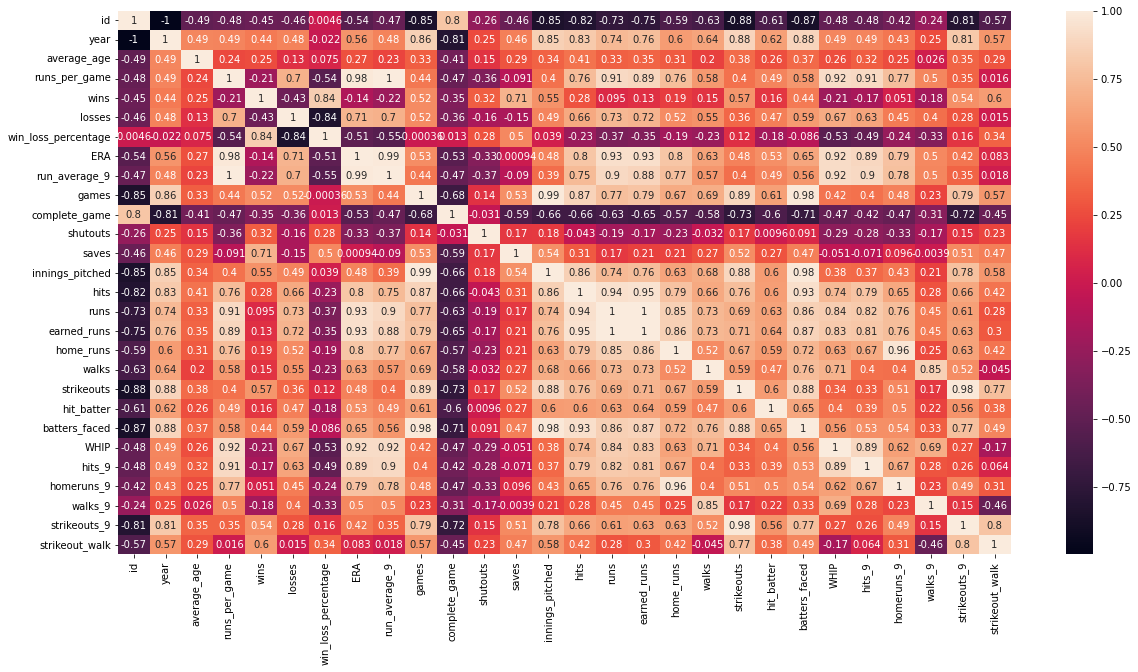

In [20]:
plt.subplots(figsize=(20,10))
sns.heatmap(hey_batter.corr(), annot=True)

Okay so we see a lot of things here. Firstly lets check out our correlations for our win_loss_percentage since that is what we will be predictings. In general win_loss_percentage doesn't have a high correlation to a lot of things. It's highest correlation is -0.55 with run_average_9  which is decent correlation but it's definitely not considered high. But since we are only analyzing pitching statistics and not fielding and batting that is to be expected since winning requires those to stats as well. The 5 highest correlations with win_loss_percentage are: 

1. run_average_9: -0.55
2. WHIP: -0.53
3. ERA: -0.51
4. saves: 0.5
5. hits_9: -0.49

runs_per_game also has a decent correlation of -0.54 but the stat itself is very similar to run_average_9 but runs_per_game depends on the defense itself behind the pitcher whereas run_average_9 depends on pitcher defense itself. Since we are calculating pitching statistics we'll exclude runs_per_game from our model analysis. Wins and losses also have a high correlation for obvious reasons so we'll exclude that for now. 

We also see that there is high correlations between things like ERA and homeruns_9 which carries a 0.79. However when compared to win_loss_percentage, homeruns_9 only has a -0.24. So while these inter-related stats do have some relation to our core 5 stats, it doesn't necessarily mean that they will be carry over with transitive property and be a defining factor in determining our win_loss_percentage. We possibly might have some use for them but for now lets set them aside. 

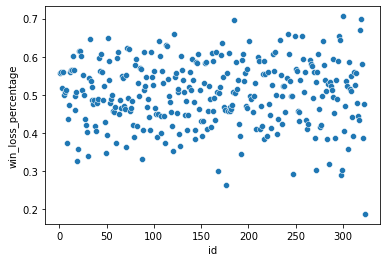

<Figure size 800x800 with 0 Axes>

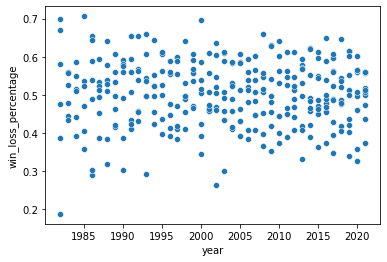

<Figure size 800x800 with 0 Axes>

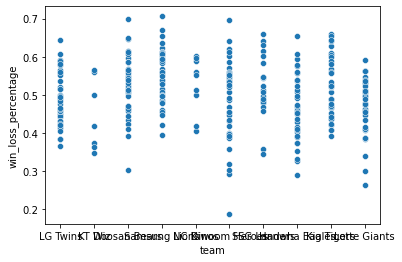

<Figure size 800x800 with 0 Axes>

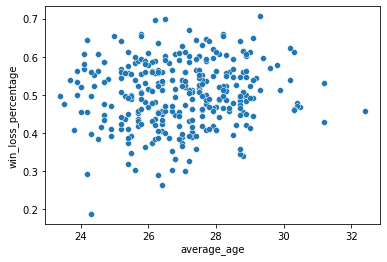

<Figure size 800x800 with 0 Axes>

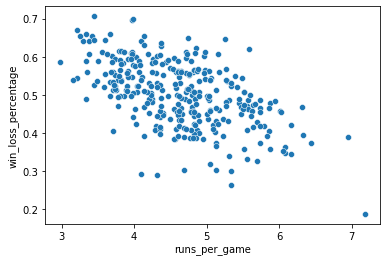

<Figure size 800x800 with 0 Axes>

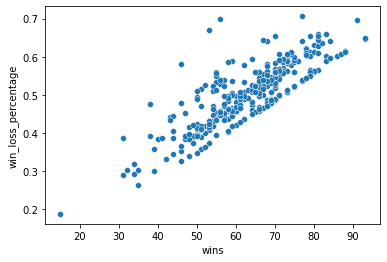

<Figure size 800x800 with 0 Axes>

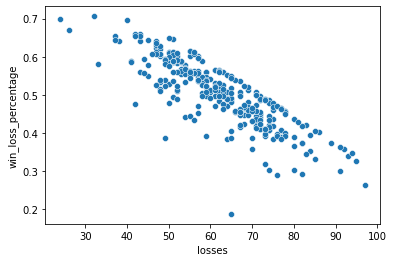

<Figure size 800x800 with 0 Axes>

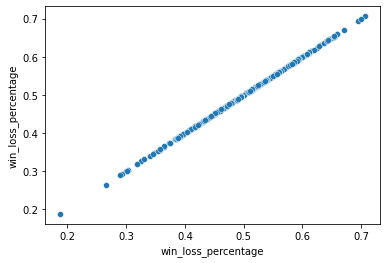

<Figure size 800x800 with 0 Axes>

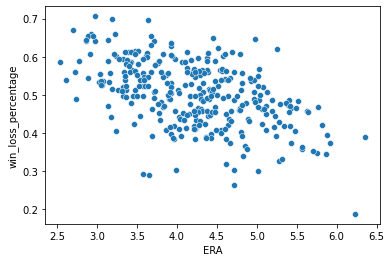

<Figure size 800x800 with 0 Axes>

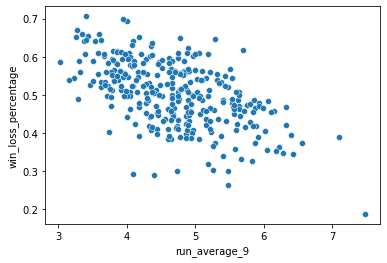

<Figure size 800x800 with 0 Axes>

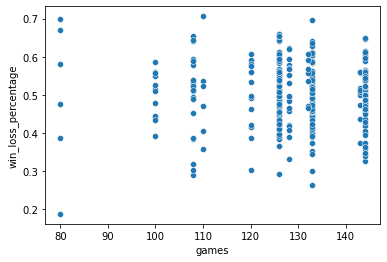

<Figure size 800x800 with 0 Axes>

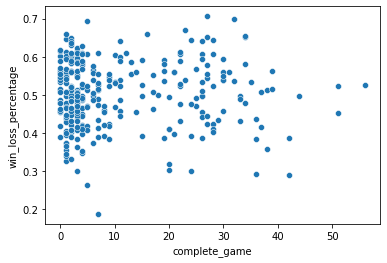

<Figure size 800x800 with 0 Axes>

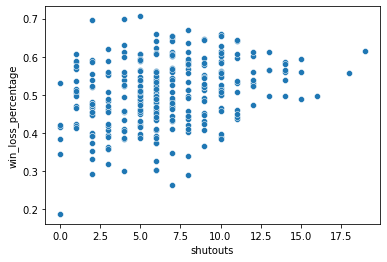

<Figure size 800x800 with 0 Axes>

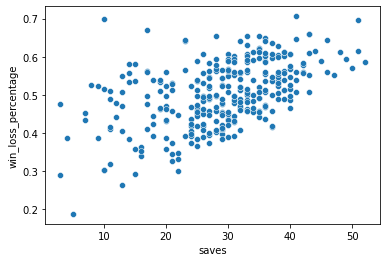

<Figure size 800x800 with 0 Axes>

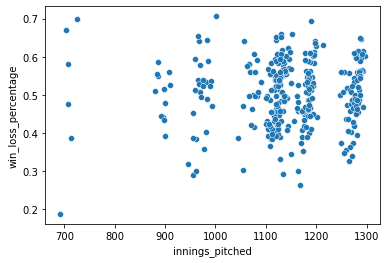

<Figure size 800x800 with 0 Axes>

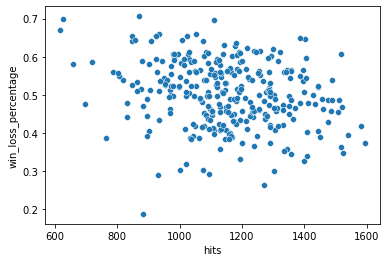

<Figure size 800x800 with 0 Axes>

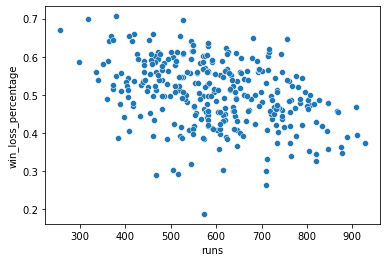

<Figure size 800x800 with 0 Axes>

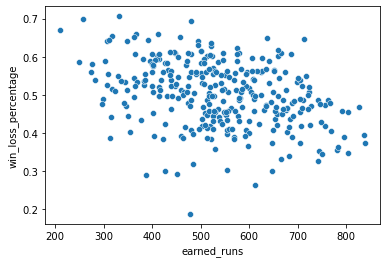

<Figure size 800x800 with 0 Axes>

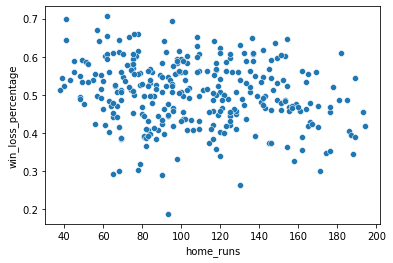

<Figure size 800x800 with 0 Axes>

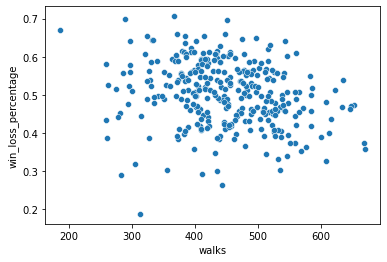

<Figure size 800x800 with 0 Axes>

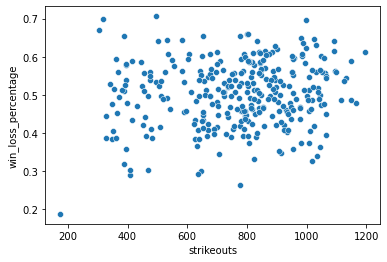

<Figure size 800x800 with 0 Axes>

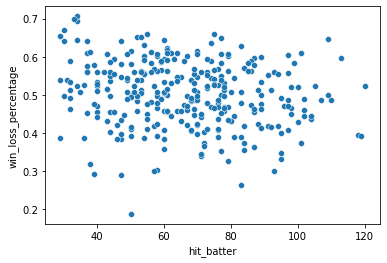

<Figure size 800x800 with 0 Axes>

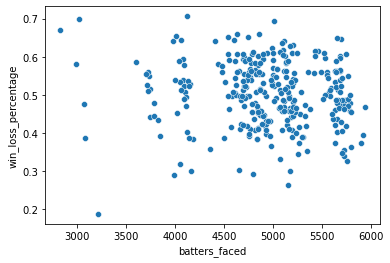

<Figure size 800x800 with 0 Axes>

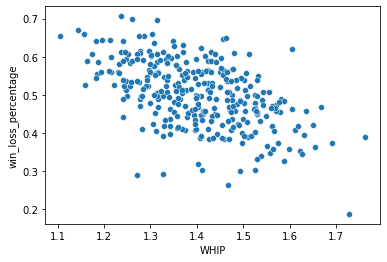

<Figure size 800x800 with 0 Axes>

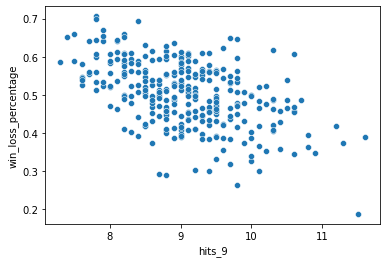

<Figure size 800x800 with 0 Axes>

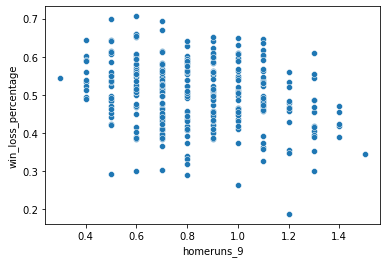

<Figure size 800x800 with 0 Axes>

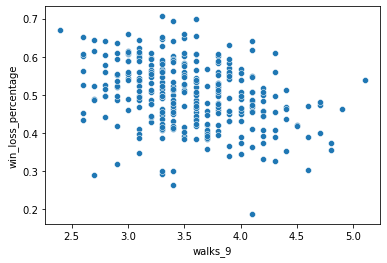

<Figure size 800x800 with 0 Axes>

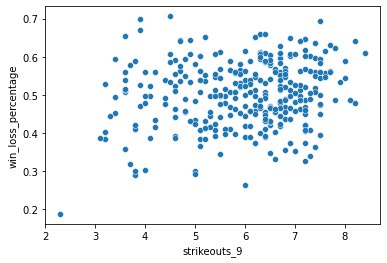

<Figure size 800x800 with 0 Axes>

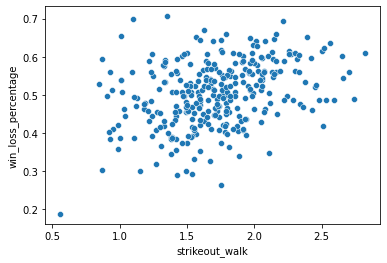

<Figure size 800x800 with 0 Axes>

In [21]:
#creating a scatterplot to confirm patterns and get a visual representation of our features against win_loss_percentage

for feature in hey_batter.columns:
    sns.scatterplot(data=hey_batter, x=feature, y='win_loss_percentage')
    plt.figure(figsize=(10,10), dpi=80)
    plt.show()

Based on our scatterplots we can see much more defined relationships with our core features than other features. 

In [22]:
#creating a new team_summary with our core 5 stats we will be using in our prediction

team_summary_new = hey_batter.groupby('team').agg(
    year = pd.NamedAgg(column='year', aggfunc='size'), 
    team_run_average_9 = pd.NamedAgg(column='run_average_9', aggfunc='mean'),
    team_WHIP = pd.NamedAgg(column='WHIP', aggfunc='mean'),
    team_ERA = pd.NamedAgg(column='ERA', aggfunc='mean'),
    team_saves = pd.NamedAgg(column='saves', aggfunc='mean'),
    team_hits_9 = pd.NamedAgg(column='hits_9', aggfunc='mean')
    
).reset_index()
team_summary_new.head(10)

,team,year,team_run_average_9,team_WHIP,team_ERA,team_saves,team_hits_9
0,Doosan Bears,40,4.400000,1.375900,3.938250,28.500000,8.790000
1,Hanwha Eagles,36,4.979167,1.422611,4.483056,28.527778,9.227778
2,KT Wiz,7,5.537143,1.519143,5.010000,27.428571,10.185714
3,Kia Tigers,40,4.557500,1.362825,4.069250,27.550000,8.825000
4,Kiwoom Heroes,40,4.741500,1.414600,4.233000,29.200000,9.205000
5,LG Twins,40,4.600500,1.396600,4.107750,30.075000,9.065000
6,Lotte Giants,40,4.736250,1.405575,4.238500,23.325000,9.270000
7,NC Dinos,9,4.905556,1.423556,4.474444,31.333333,9.200000
8,SSG Landers,22,4.742727,1.412636,4.309545,32.272727,8.968182
9,Samsung Lions,40,4.557750,1.389850,4.103000,32.575000,8.902500


This is the team summaries including their average stats and how many years each team has been in the league. From here we can do some comparisons to the league averages we calculated above. 

Lets explore our teams some more. We have a team summary but it's jumbled and hard to read. We should organize it a bit so we can better understand it. We'll go in order of our stats above. What we are looking for is 

1. low average run_average_9
2. low average WHIP
3. low average ERA
4. high average saves
5. low average hits_9

In [23]:
#set index to team for easier reading and understanding the sort values accordingly

team_summary_ind = team_summary_new.set_index('team')

team_summary_ind['team_run_average_9'].sort_values(ascending=True).head(10)                            

team
Doosan Bears     4.400000
Kia Tigers       4.557500
Samsung Lions    4.557750
LG Twins         4.600500
Lotte Giants     4.736250
Kiwoom Heroes    4.741500
SSG Landers      4.742727
NC Dinos         4.905556
Hanwha Eagles    4.979167
KT Wiz           5.537143
Name: team_run_average_9, dtype: float64

In [24]:
team_summary_ind['team_WHIP'].sort_values(ascending=True).head(10)

team
Kia Tigers       1.362825
Doosan Bears     1.375900
Samsung Lions    1.389850
LG Twins         1.396600
Lotte Giants     1.405575
SSG Landers      1.412636
Kiwoom Heroes    1.414600
Hanwha Eagles    1.422611
NC Dinos         1.423556
KT Wiz           1.519143
Name: team_WHIP, dtype: float64

In [25]:
team_summary_ind['team_ERA'].sort_values(ascending=True).head(10)

team
Doosan Bears     3.938250
Kia Tigers       4.069250
Samsung Lions    4.103000
LG Twins         4.107750
Kiwoom Heroes    4.233000
Lotte Giants     4.238500
SSG Landers      4.309545
NC Dinos         4.474444
Hanwha Eagles    4.483056
KT Wiz           5.010000
Name: team_ERA, dtype: float64

In [26]:
team_summary_ind['team_saves'].sort_values(ascending=False).head(10)

team
Samsung Lions    32.575000
SSG Landers      32.272727
NC Dinos         31.333333
LG Twins         30.075000
Kiwoom Heroes    29.200000
Hanwha Eagles    28.527778
Doosan Bears     28.500000
Kia Tigers       27.550000
KT Wiz           27.428571
Lotte Giants     23.325000
Name: team_saves, dtype: float64

In [27]:
team_summary_ind['team_hits_9'].sort_values(ascending=True).head(10)

team
Doosan Bears      8.790000
Kia Tigers        8.825000
Samsung Lions     8.902500
SSG Landers       8.968182
LG Twins          9.065000
NC Dinos          9.200000
Kiwoom Heroes     9.205000
Hanwha Eagles     9.227778
Lotte Giants      9.270000
KT Wiz           10.185714
Name: team_hits_9, dtype: float64

Looking at these sorted values we can see one commonality between these charts. In 4/5 of these charts; Kia Tigers, Doosan Bears, and Samsung Lions hold the top 3 rankings in all of them except for team_saves with Samsung Lions being the only one to remain in the top 3 in team_saves. If we do a little background check we can also see that these 3 teams also hold the top 3 spots for the most amount of championships within the league. So far it looks like we have picked the right stats for our prediction analysis. We can move on to pre-processing and training. 

# Pre-Processing and Training

Since our model is a predictive model trying to predict win percentage we will be using linear regression analysis. That will be our main form of analysis.

For now we'll extract our teams and create their respective dataframes and team names for future analysis and set up our regression model with a 75/25 training/testing split. 

In [28]:
#extracting all the teams and creating separate dataframes for each team since we need to predict each of their win percentages

samsung = hey_batter[hey_batter['team'] == 'Samsung Lions']
samsung_df = hey_batter[hey_batter['team'] != 'Samsung Lions']

doosan = hey_batter[hey_batter['team'] == 'Doosan Bears']

kia = hey_batter[hey_batter['team'] == 'Kia Tigers']

kt = hey_batter[hey_batter['team'] == 'KT Wiz']

ssg = hey_batter[hey_batter['team'] == 'SSG Landers']

lg = hey_batter[hey_batter['team'] == 'LG Twins']

nc = hey_batter[hey_batter['team'] == 'NC Dinos']

kiwoom = hey_batter[hey_batter['team'] == 'Kiwoom Heroes']

#going to create an extra df here to use for our training and test its performance
hanwha = hey_batter[hey_batter['team'] == 'Hanwha Eagles']
hanwha_df = hey_batter[hey_batter['team'] != 'Hanwha Eagles']

lotte = hey_batter[hey_batter['team'] == 'Lotte Giants']

We're going to be testing out the first linear regression model using only the core 5 features we selected through our correlation heatmap and analysis. After checking performance we can see if we need to add more or less features. 

In [29]:
#using hanwha as our 5 feature example

X_hanwha_ex = hanwha_df[['run_average_9', 'WHIP', 'ERA', 'saves', 'hits_9']]
y_hanwha_ex = hanwha_df['win_loss_percentage']
X_train_hanwha_ex, X_test_hanwha_ex, y_train_hanwha_ex, y_test_hanwha_ex = train_test_split(X_hanwha_ex, y_hanwha_ex, test_size=0.25, 
                                                                                            random_state=42)

In [30]:
#creating and testing out first linear regression model

lr = LinearRegression()
lr.fit(X_train_hanwha_ex, y_train_hanwha_ex)

y_pred_hanwha_ex = lr.predict(X_test_hanwha_ex)
score_ex = r2_score(y_test_hanwha_ex, y_pred_hanwha_ex)

print(score_ex)
print(np.sqrt(mean_squared_error(y_test_hanwha_ex, y_pred_hanwha_ex)))


0.3045985430440332
0.06611286627899203


So in terms of our first model we have a HORRIBLY low accuracy using only 5 features. With an accuracy of 30%, that definitely is not going to do it for John Doe. While those might be our core 5 features, it doesn't look like it is enough to create an accurate prediction. Instead of going through and trying to find the exact number of features that we might need one by one, we're going to use SelectKBest to save some time. 

In [31]:
#creating training and testing set. starting with samsung lions df first for some testing


#drop the categorical features from each team's dataframe
X_samsung = samsung_df.drop(columns=['win_loss_percentage', 'team'])
y_samsung = samsung_df['win_loss_percentage']
X_train_samsung, X_test_samsung, y_train_samsung, y_test_samsung = train_test_split(X_samsung, y_samsung, test_size=0.25, 
                                                                                    random_state=42)

In [32]:
#making a pipeline using SelectKBest for our feature selection

pipe = make_pipeline(
        SelectKBest(f_regression),
        LinearRegression())

#looking for the selectkbest__k parameter which we will use in our next code cell
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearregression', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [33]:
#using our above parameter we are looping through the amount of features in our df's to find the best number for our k 

k_samsung = [k+1 for k in range(len(X_train_samsung.columns))]
params = {'selectkbest__k': k_samsung}


#fitting our pipeline and parameters to GridSearchCV to help cross validate our regression model a little
reg = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1)


reg.fit(X_train_samsung, y_train_samsung)

cv_k_samsung = [k_samsung for k_samsung in reg.cv_results_['param_selectkbest__k']]

reg.best_params_

{'selectkbest__k': 21}

It looks like we need a total of 21 features in order to make our model prediction work. Let's test it out.

In [34]:
#predicting and then checking our r^2 and mean squared error

y_pred_samsung_tr = reg.predict(X_train_samsung)
score2 = r2_score(y_train_samsung, y_pred_samsung_tr)

y_pred_samsung = reg.predict(X_test_samsung)
score = r2_score(y_test_samsung, y_pred_samsung)
print(score)
print(np.sqrt(mean_squared_error(y_test_samsung, y_pred_samsung)))

print(score2)
print(np.sqrt(mean_squared_error(y_train_samsung, y_pred_samsung_tr)))

0.986696996697635
0.009750708769620019
0.9961776011082052
0.005227551511437963


We got a total of 98.7% accuracy with a RMSE of .009 which is much better and much more accurate than our previous 30%. However I suspect there might be some overfitting in our model since 98% is a very high percentage for accuracy we should be wary of that. Although this is a linear regression problem, it may also be considered a time series problem considering we have 40 years of information in our dataset for each team. So we should test out using some time series methods. 

Before that lets first we should check our with of our features that performed the best. 

In [35]:
#using best_estimator to get the and then creating a Series for our best features and how much they affect our model

selected = reg.best_estimator_.named_steps.selectkbest.get_support()
coefs = reg.best_estimator_.named_steps.linearregression.coef_
features = X_train_samsung.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False) 

ERA                0.032781
walks_9            0.030272
run_average_9      0.029564
strikeouts_9       0.020888
strikeout_walk     0.008107
wins               0.003934
runs               0.000565
hits               0.000383
walks              0.000113
shutouts           0.000094
saves              0.000067
home_runs          0.000060
innings_pitched   -0.000131
strikeouts        -0.000169
earned_runs       -0.000278
games             -0.003345
losses            -0.003988
homeruns_9        -0.011489
hits_9            -0.012524
runs_per_game     -0.097552
WHIP              -0.350824
dtype: float64

So it seems that these are all the features that performed the best to train our model. 

Lets move on to our time series model. We're going to create a list of our best features here and see if we can apply it to our time series model. 

In [36]:
#create a list of our best features to possibly use in our time series model 
predictors = ['ERA','walks_9','run_average_9','strikeouts_9','strikeout_walk','wins','runs','hits','walks','shutouts','saves','home_runs','innings_pitched','strikeouts','earned_runs','games','losses','homeruns_9','hits_9','runs_per_game','WHIP']

For our time series model we are going to first create a function to apply to our dataset that will create a 'Next W/L' column and adding to that column will be our 'win_loss_percentage' column shifted back one. This will be useful for our future model to test our predictions vs. the actual W/L ratios. 

In [37]:
#creating a copy of our dataframe to use for our time series model, had some trouble with copy methods
hey_batter_2 = hey_batter

#copy/pasting our data cleaning from before
hey_batter_2['team'].replace({'SK Wyverns': 'SSG Landers', 'Sammi Superstars': 'Kiwoom Heroes', 'Chungbo Pintos': 'Kiwoom Heroes', 'Pacific Dolphins': 'Kiwoom Heroes','Hyundai Unicorns': 'Kiwoom Heroes', 'Woori Heroes': 'Kiwoom Heroes', 'Nexen Heroes': 'Kiwoom Heroes', 'MBC Blue Dragons': 'LG Twins', 'Binggre Eagles': 'Hanwha Eagles', 'OB Bears': 'Doosan Bears', 'Haitai Tigers': 'Kia Tigers'}, inplace=True)
hey_batter_2 = hey_batter_2[hey_batter_2['team'] != 'Ssangbangwool Raiders']


#this definition will create a new column that will have the prediction for the next W/L ratio and shift all win ratios back
def next_win_ratio(team): 
    team = team.sort_values('year')
    team['next_W/L'] = team['win_loss_percentage'].shift(-1)
    return team


#applying our function to our dataset
hey_batter_2 = hey_batter_2.groupby('team', group_keys=False).apply(next_win_ratio)

#dropping any NaN values, creating a copy before it for future calculations
hey_batter_full = hey_batter_2.copy()
hey_batter_2 = hey_batter_2.dropna()

#checking dataset
hey_batter_2

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,strikeouts,hit_batter,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,next_W/L
318,319,1982,Doosan Bears,26.5,3.98,56,24,0.700,3.19,3.95,...,318,33,3020,1.260,7.8,0.5,3.6,3.9,1.10,0.444
315,316,1983,Doosan Bears,26.9,4.32,44,55,0.444,3.54,4.36,...,329,62,3789,1.358,9.0,0.8,3.2,3.3,1.04,0.586
305,306,1984,Doosan Bears,24.7,2.98,58,41,0.586,2.54,3.03,...,445,44,3601,1.187,7.3,0.5,3.4,4.5,1.34,0.472
301,302,1985,Doosan Bears,26.7,3.78,51,57,0.472,3.14,3.77,...,433,40,4112,1.277,8.0,0.6,3.5,3.9,1.12,0.538
292,293,1986,Doosan Bears,27.0,3.16,56,48,0.538,2.61,3.15,...,394,29,4003,1.240,7.6,0.4,3.6,3.6,1.01,0.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,2016,Samsung Lions,28.8,6.03,65,78,0.455,5.64,6.10,...,935,87,5799,1.579,10.6,1.4,3.6,6.6,1.81,0.396
49,50,2017,Samsung Lions,28.5,6.33,55,84,0.396,5.88,6.40,...,1063,118,5916,1.630,10.8,1.3,3.8,7.5,1.94,0.486
34,35,2018,Samsung Lions,28.7,5.57,68,72,0.486,5.19,5.62,...,1114,107,5740,1.492,10.3,1.3,3.1,7.8,2.53,0.420
27,28,2019,Samsung Lions,28.6,5.08,60,83,0.420,4.64,5.16,...,924,70,5638,1.455,9.4,0.9,3.7,6.5,1.77,0.460


Next we want to do some more feature selection. We have the list that we created called 'predictors' but that was columns selected from our SelectKBest feature selection. We're going to use a more time series specialized feature selection with TimeSeriesSplit and SequentialFeatureSelector. We're going to compare the two and see how they measure up. I don't think that there will be much difference but we should test just in case. 

Another note is that we will be doing a ridge regression model this time around. This will help prevent overfitting within our data that we had previously 

In [38]:
#initiazling our ridge regression with only an alpha of 1
rr = Ridge(alpha=1)

#TimeSeriesSplit splits the data in a time series manner
ts_split = TimeSeriesSplit(n_splits=3)

#using sfs will go forward through our features and select 21 of our best features using the time series split. we chose 21  
#since SelectKBest said that is a good amount of features to select
sfs = SequentialFeatureSelector(rr, n_features_to_select=21, direction='forward', cv=ts_split, n_jobs=4)

In [39]:
#removing and selecting some columns so our sfs doesn't select our targeted column or overfit to any other columns like 'year' 
#or 'team'

removed_columns = ['next_W/L', 'team', 'id', 'year']
selected_columns = hey_batter_2.columns[~hey_batter_2.columns.isin(removed_columns)]

In [40]:
#this time we are also going to apply a MinMax Scaling to our features to create ratios between our features that a standard
#scaler will create negatives within our data and also since we will be using a different regression model

scaler = MinMaxScaler()
hey_batter_2.loc[:, selected_columns] = scaler.fit_transform(hey_batter_2[selected_columns])

#checking our scaled features
hey_batter_2

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,strikeouts,hit_batter,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,next_W/L
318,319,1982,Doosan Bears,0.344444,0.238095,0.525641,0.000000,0.988417,0.170604,0.207207,...,0.140334,0.043956,0.061152,0.235115,0.116279,0.166667,0.444444,0.262295,0.238938,0.444
315,316,1983,Doosan Bears,0.388889,0.319048,0.371795,0.424658,0.494208,0.262467,0.299550,...,0.151129,0.362637,0.308658,0.384733,0.395349,0.416667,0.296296,0.163934,0.212389,0.586
305,306,1984,Doosan Bears,0.144444,0.000000,0.551282,0.232877,0.768340,0.000000,0.000000,...,0.264966,0.164835,0.248149,0.123664,0.000000,0.166667,0.370370,0.360656,0.345133,0.472
301,302,1985,Doosan Bears,0.366667,0.190476,0.461538,0.452055,0.548263,0.157480,0.166667,...,0.253189,0.120879,0.412617,0.261069,0.162791,0.250000,0.407407,0.262295,0.247788,0.538
292,293,1986,Doosan Bears,0.400000,0.042857,0.525641,0.328767,0.675676,0.018373,0.027027,...,0.214917,0.000000,0.377535,0.204580,0.069767,0.083333,0.444444,0.213115,0.199115,0.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,2016,Samsung Lions,0.600000,0.726190,0.641026,0.739726,0.515444,0.813648,0.691441,...,0.745829,0.637363,0.955584,0.722137,0.767442,0.916667,0.444444,0.704918,0.553097,0.396
49,50,2017,Samsung Lions,0.566667,0.797619,0.512821,0.821918,0.401544,0.876640,0.759009,...,0.871443,0.978022,0.993241,0.800000,0.813953,0.833333,0.518519,0.852459,0.610619,0.486
34,35,2018,Samsung Lions,0.588889,0.616667,0.679487,0.657534,0.575290,0.695538,0.583333,...,0.921492,0.857143,0.936595,0.589313,0.697674,0.833333,0.259259,0.901639,0.871681,0.420
27,28,2019,Samsung Lions,0.577778,0.500000,0.576923,0.808219,0.447876,0.551181,0.479730,...,0.735034,0.450549,0.903766,0.532824,0.488372,0.500000,0.481481,0.688525,0.535398,0.460


In [41]:
#now we can fit our sfs to our data

sfs.fit(hey_batter_2[selected_columns], hey_batter_2['next_W/L'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=21,
                          n_jobs=4)

In [42]:
#creating a list of our sfs features
predictors2 = list(selected_columns[sfs.get_support()])

Now we can move on to creating another function. This will be our training and testing split as well as a function to prevent our data from using previous future columns to predict previous columns. For example if we want to predict 2016 year's W/L ratio, we wouldn't want to use 2017 and above to do that. We would only want to use data from 2015 and below to predict 2016. We

In [92]:
#function to help prevent future data being used to predict past data
def backtest(data, model, predictors, start=10, step=1):
    woops = data.copy()
    all_predictions = []
    
    years = sorted(data['year'].unique())
    
    for i in range(start, len(years), step): 
        current_year = years[i]
        
        train = data[data['year'] < current_year]
        test = data[data['year'] == current_year]
        
        model.fit(train[predictors], train['next_W/L'])
        
        prediction = model.predict(test[predictors])
        prediction = pd.Series(prediction, index=test.index)
        combined = pd.concat([test['next_W/L'], prediction], axis=1)
        combined.columns = ['actual', 'prediction']
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

We have our function and our features, now we can go on to some testing. Using our backtest we will create some predictions with our predictors lists that we created before and then test our mean squared errors to see how we do. 

In [93]:
#our first predictions with the first predictors list we used from our SelectKBest feature selector
predictions = backtest(hey_batter_2, rr, predictors)

In [94]:
#checking our predictions
predictions

,actual,prediction
251,0.545,0.503526
248,0.496,0.583138
249,0.659,0.553327
252,0.293,0.513988
253,0.537,0.487514
...,...,...
11,0.558,0.524237
15,0.474,0.489373
13,0.500,0.544077
19,0.512,0.445725


In [95]:
#printing out our describe of our targeted feature to compare our mean squared error to as well as we want the square root of 
#our MSE (RMSE) to be lower than the STD of our data
hey_batter_2['next_W/L'].describe()

count    304.000000
mean       0.504582
std        0.080938
min        0.265000
25%        0.451750
50%        0.508000
75%        0.561250
max        0.706000
Name: next_W/L, dtype: float64

In [96]:
mean_squared_error(predictions['actual'], predictions['prediction'])

0.0054090683077560615

In [97]:
0.0054090683077560615 ** 0.5

(0.07473689215724592, 0.0735463684199027)

So far so good! We have our RMSE lower than our STD and in general our MSE is pretty low already which is good. Lets check our other predictors list we used with sfs 

In [98]:
#predictions2 with our sfs feature selector list
predictions2 = backtest(hey_batter_2, rr, predictors2)

In [99]:
predictions2

,actual,prediction
251,0.545,0.498227
248,0.496,0.586233
249,0.659,0.561083
252,0.293,0.520066
253,0.537,0.487419
...,...,...
11,0.558,0.530282
15,0.474,0.477168
13,0.500,0.543571
19,0.512,0.440595


In [100]:
mean_squared_error(predictions2['actual'], predictions2['prediction'])

0.005418016557631755

In [111]:
0.005418016557631755 ** 0.5

0.07360717735134092

There isn't much difference between the two lists. We should stick with the sfs predictor list however since it was made with the intent of being a time series model. 

Now we are going to try to improve our model a bit with some functions that will add some features to our model such as W/L correlation, W/L difference, which season the team is in, as well as how well the team's averages compare to the rest of the league. 

In [104]:
#function for team history of which season they are in, their W/L correlations, and W/L difference
def team_history(df): 
    df = df.sort_values('year')
    
    df['team_season'] = range(0, df.shape[0])
    df['W/L_corr'] = list(df[['team_season', 'win_loss_percentage']].expanding().corr().loc[(slice(None), 'team_season'), 'win_loss_percentage'])
    df['W/L_corr'].fillna(1, inplace=True)
    
    df['W/L_diff'] = df['win_loss_percentage'] / df['win_loss_percentage'].shift(1)
    df['W/L_diff'].fillna(1, inplace=True)
    
    df['W/L_diff'][df['W/L_diff'] == np.inf] = 1
    
    return df

#apply the function to the dataframe
hey_batter_2 = hey_batter_2.groupby('team', group_keys=False).apply(team_history)

In [105]:
#function to compare team average W/L ratio to the rest of the league
def team_averages(df): 
    return df['win_loss_percentage'] / df['win_loss_percentage'].mean()

In [106]:
#apply the function to the dataframe by year since it per season
hey_batter_2['W/L_season'] = hey_batter_2.groupby('year', group_keys=False).apply(team_averages)

In [107]:
#creating a new list with our new features and our previous features
new_predictors = predictors2 + ['team_season', 'W/L_corr', 'W/L_season', 'W/L_diff']

In [108]:
#prediction3 with our new_predictors
predictions3 = backtest(hey_batter_2, rr, new_predictors)

In [109]:
mean_squared_error(predictions3['actual'], predictions3['prediction'])

0.005541428334449029

In [110]:
0.005541428334449029 ** 0.5

0.0744407706465283

Our model doesn't change by much but it does seem to get worse with these features so we'll keep them out for now. 

In [60]:
hey_batter_2.drop(columns=['team_season', 'W/L_corr', 'W/L_season', 'W/L_diff'])

,id,year,team,average_age,runs_per_game,wins,losses,win_loss_percentage,ERA,run_average_9,...,strikeouts,hit_batter,batters_faced,WHIP,hits_9,homeruns_9,walks_9,strikeouts_9,strikeout_walk,next_W/L
318,319,1982,Doosan Bears,0.344444,0.238095,0.525641,0.000000,0.988417,0.170604,0.207207,...,0.140334,0.043956,0.061152,0.235115,0.116279,0.166667,0.444444,0.262295,0.238938,0.444
315,316,1983,Doosan Bears,0.388889,0.319048,0.371795,0.424658,0.494208,0.262467,0.299550,...,0.151129,0.362637,0.308658,0.384733,0.395349,0.416667,0.296296,0.163934,0.212389,0.586
305,306,1984,Doosan Bears,0.144444,0.000000,0.551282,0.232877,0.768340,0.000000,0.000000,...,0.264966,0.164835,0.248149,0.123664,0.000000,0.166667,0.370370,0.360656,0.345133,0.472
301,302,1985,Doosan Bears,0.366667,0.190476,0.461538,0.452055,0.548263,0.157480,0.166667,...,0.253189,0.120879,0.412617,0.261069,0.162791,0.250000,0.407407,0.262295,0.247788,0.538
292,293,1986,Doosan Bears,0.400000,0.042857,0.525641,0.328767,0.675676,0.018373,0.027027,...,0.214917,0.000000,0.377535,0.204580,0.069767,0.083333,0.444444,0.213115,0.199115,0.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,2016,Samsung Lions,0.600000,0.726190,0.641026,0.739726,0.515444,0.813648,0.691441,...,0.745829,0.637363,0.955584,0.722137,0.767442,0.916667,0.444444,0.704918,0.553097,0.396
49,50,2017,Samsung Lions,0.566667,0.797619,0.512821,0.821918,0.401544,0.876640,0.759009,...,0.871443,0.978022,0.993241,0.800000,0.813953,0.833333,0.518519,0.852459,0.610619,0.486
34,35,2018,Samsung Lions,0.588889,0.616667,0.679487,0.657534,0.575290,0.695538,0.583333,...,0.921492,0.857143,0.936595,0.589313,0.697674,0.833333,0.259259,0.901639,0.871681,0.420
27,28,2019,Samsung Lions,0.577778,0.500000,0.576923,0.808219,0.447876,0.551181,0.479730,...,0.735034,0.450549,0.903766,0.532824,0.488372,0.500000,0.481481,0.688525,0.535398,0.460


We should check out the new features our sfs has selected vs. our SelectKBest and see if there was any difference between the two. 

In [61]:
pd.Series(rr.coef_, index=new_predictors).sort_values()

losses                -0.058782
earned_runs           -0.053743
ERA                   -0.037662
average_age           -0.029800
W/L_diff              -0.027135
shutouts              -0.024637
runs                  -0.024521
home_runs             -0.012577
strikeout_walk        -0.011679
saves                 -0.007503
team_season           -0.000322
W/L_corr               0.002804
run_average_9          0.006236
hits                   0.009819
games                  0.010331
homeruns_9             0.010765
runs_per_game          0.011177
batters_faced          0.013664
WHIP                   0.021064
hits_9                 0.023013
innings_pitched        0.024633
win_loss_percentage    0.028476
hit_batter             0.039370
W/L_season             0.043780
wins                   0.085457
dtype: float64

We do see some difference such as the number of batters faced. It looks like there is a difference when using our TimeSeriesSplit. The amount of batters faced over the years is a good feature to have when looking at pitchers. 

We have our model ready. our model is in the form of our backtest function so using the copy that we made earily with hey_batter_full before the 2021 columns were dropped we are going to predict win_percentages of 2022. An important thing to note is that our model is made specifically for the KBO league. John Doe is specifically interested in buying a team from the KBO. For this reason we are keeping the teams in our training and testing sets since the best way to evaluate each team's win percentage is to base the model upon their own data. Making models for sports teams often times involves training and testing on it's own data which is why we are making our calculations this way without extracting or removing the teams one by one.  

# Modeling

It's time for the moment of truth, to predict each team's win percentage for the 2022 season based on their 2021 season. 

We're going to take hey_batter_full which includes the 2021 season compared to hey_batter_2 which does and then put it through our time series model function backtest(). We're then going to apply tail(10) to it so that we can see and evaluate all 10 of our team's predicted win percentage for the 2022 season. 